In [1]:
import torch
import Dataset
import TrainModel
import Result_Analysis
import matplotlib.pyplot as plt
import cv2
import numpy as np
import Models
import dataset_utils

In [3]:
data_loader_dict = Dataset.create_dataloader_dict(image_folder_train="final_dataset/train/images"
                               ,label_folder_train="final_dataset/train/labels",
                                image_folder_val="final_dataset/validation/images",
                                label_folder_val="final_dataset/validation/labels")



show_dataset = False
train_flag = False
vis_flag = True

In [3]:
if show_dataset:
    x_t,y_t = next(iter(data_loader_dict['train']))
    x_v,y_v = next(iter(data_loader_dict['val']))
    dataset_utils.present_supervised_dataset(x_t,y_t)

In [4]:
if show_dataset:    
    dataset_utils.present_supervised_dataset(x_v,y_v)

In [4]:
if train_flag:
    model_1 = Models.ResNetUNet_RoadSeg()
    loss_1 = torch.nn.MSELoss()
    metrics_train_dict_1, metrics_val_dict_1 = TrainModel.TrainUnet(data_loader_dict,model_1,loss_1)
    torch.cuda.empty_cache()
    
    Result_Analysis.WriteDictToCsv('MSE_loss_train_1.csv',metrics_train_dict_1)
    Result_Analysis.WriteDictToCsv('MSE_loss_val_1.csv',metrics_val_dict_1)

    

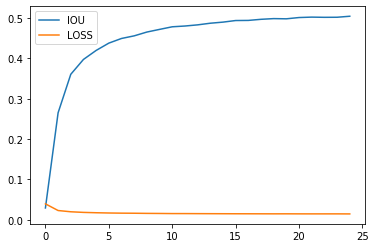

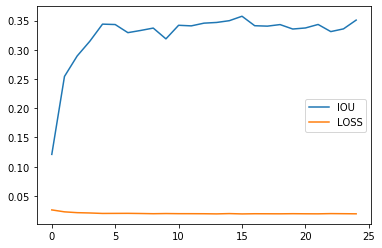

In [5]:
if vis_flag:
    Result_Analysis.LoadCsvAndShowRes('MSE_loss_train_1.csv')
    Result_Analysis.LoadCsvAndShowRes('MSE_loss_val_1.csv')

In [55]:
if vis_flag:
    dataset_target = Dataset.TargetImages('test/image')
    data_loader_target = torch.utils.data.DataLoader(dataset_target, 
                                batch_size=1,
                                shuffle=True)

    data_loader_iter_target = iter(data_loader_target)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


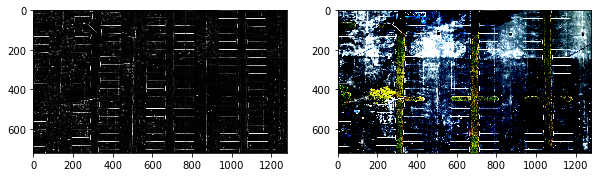

In [66]:
if vis_flag:
    
    to_show = next(data_loader_iter_target)
    model = Models.ResNetUNet_RoadSeg()
    #val_num = len(data_loader_dict_test['val'])
    #f_name = f'res_unet_IOU_MSE_{val_num}.pth'
    model.load_state_dict(torch.load('res_unet_IOU_MSE_454.pth'))


    if torch.cuda.is_available():
        model = model.cuda()
        to_show = to_show.cuda()

    with torch.no_grad(): 
        model = model.cuda()
        to_show = to_show.cuda()
        mask = model.predict_real_image(to_show)
        fig, ax = plt.subplots(nrows=1, ncols=2,figsize=(10,20))

        lb_1 = mask[0,:].clone().detach().cpu().numpy()
        lb_1 = np.array([lb_1,lb_1,lb_1]).reshape(3,720,1280)
        lb_1 = np.transpose(lb_1, axes=(1,2,0))
        ax[0].imshow(lb_1,cmap='gray')

        im_1 = to_show[0,:].clone().detach().cpu().numpy() 
        im_1 = np.transpose(im_1, axes=(1,2,0))
        ax[1].imshow(im_1)


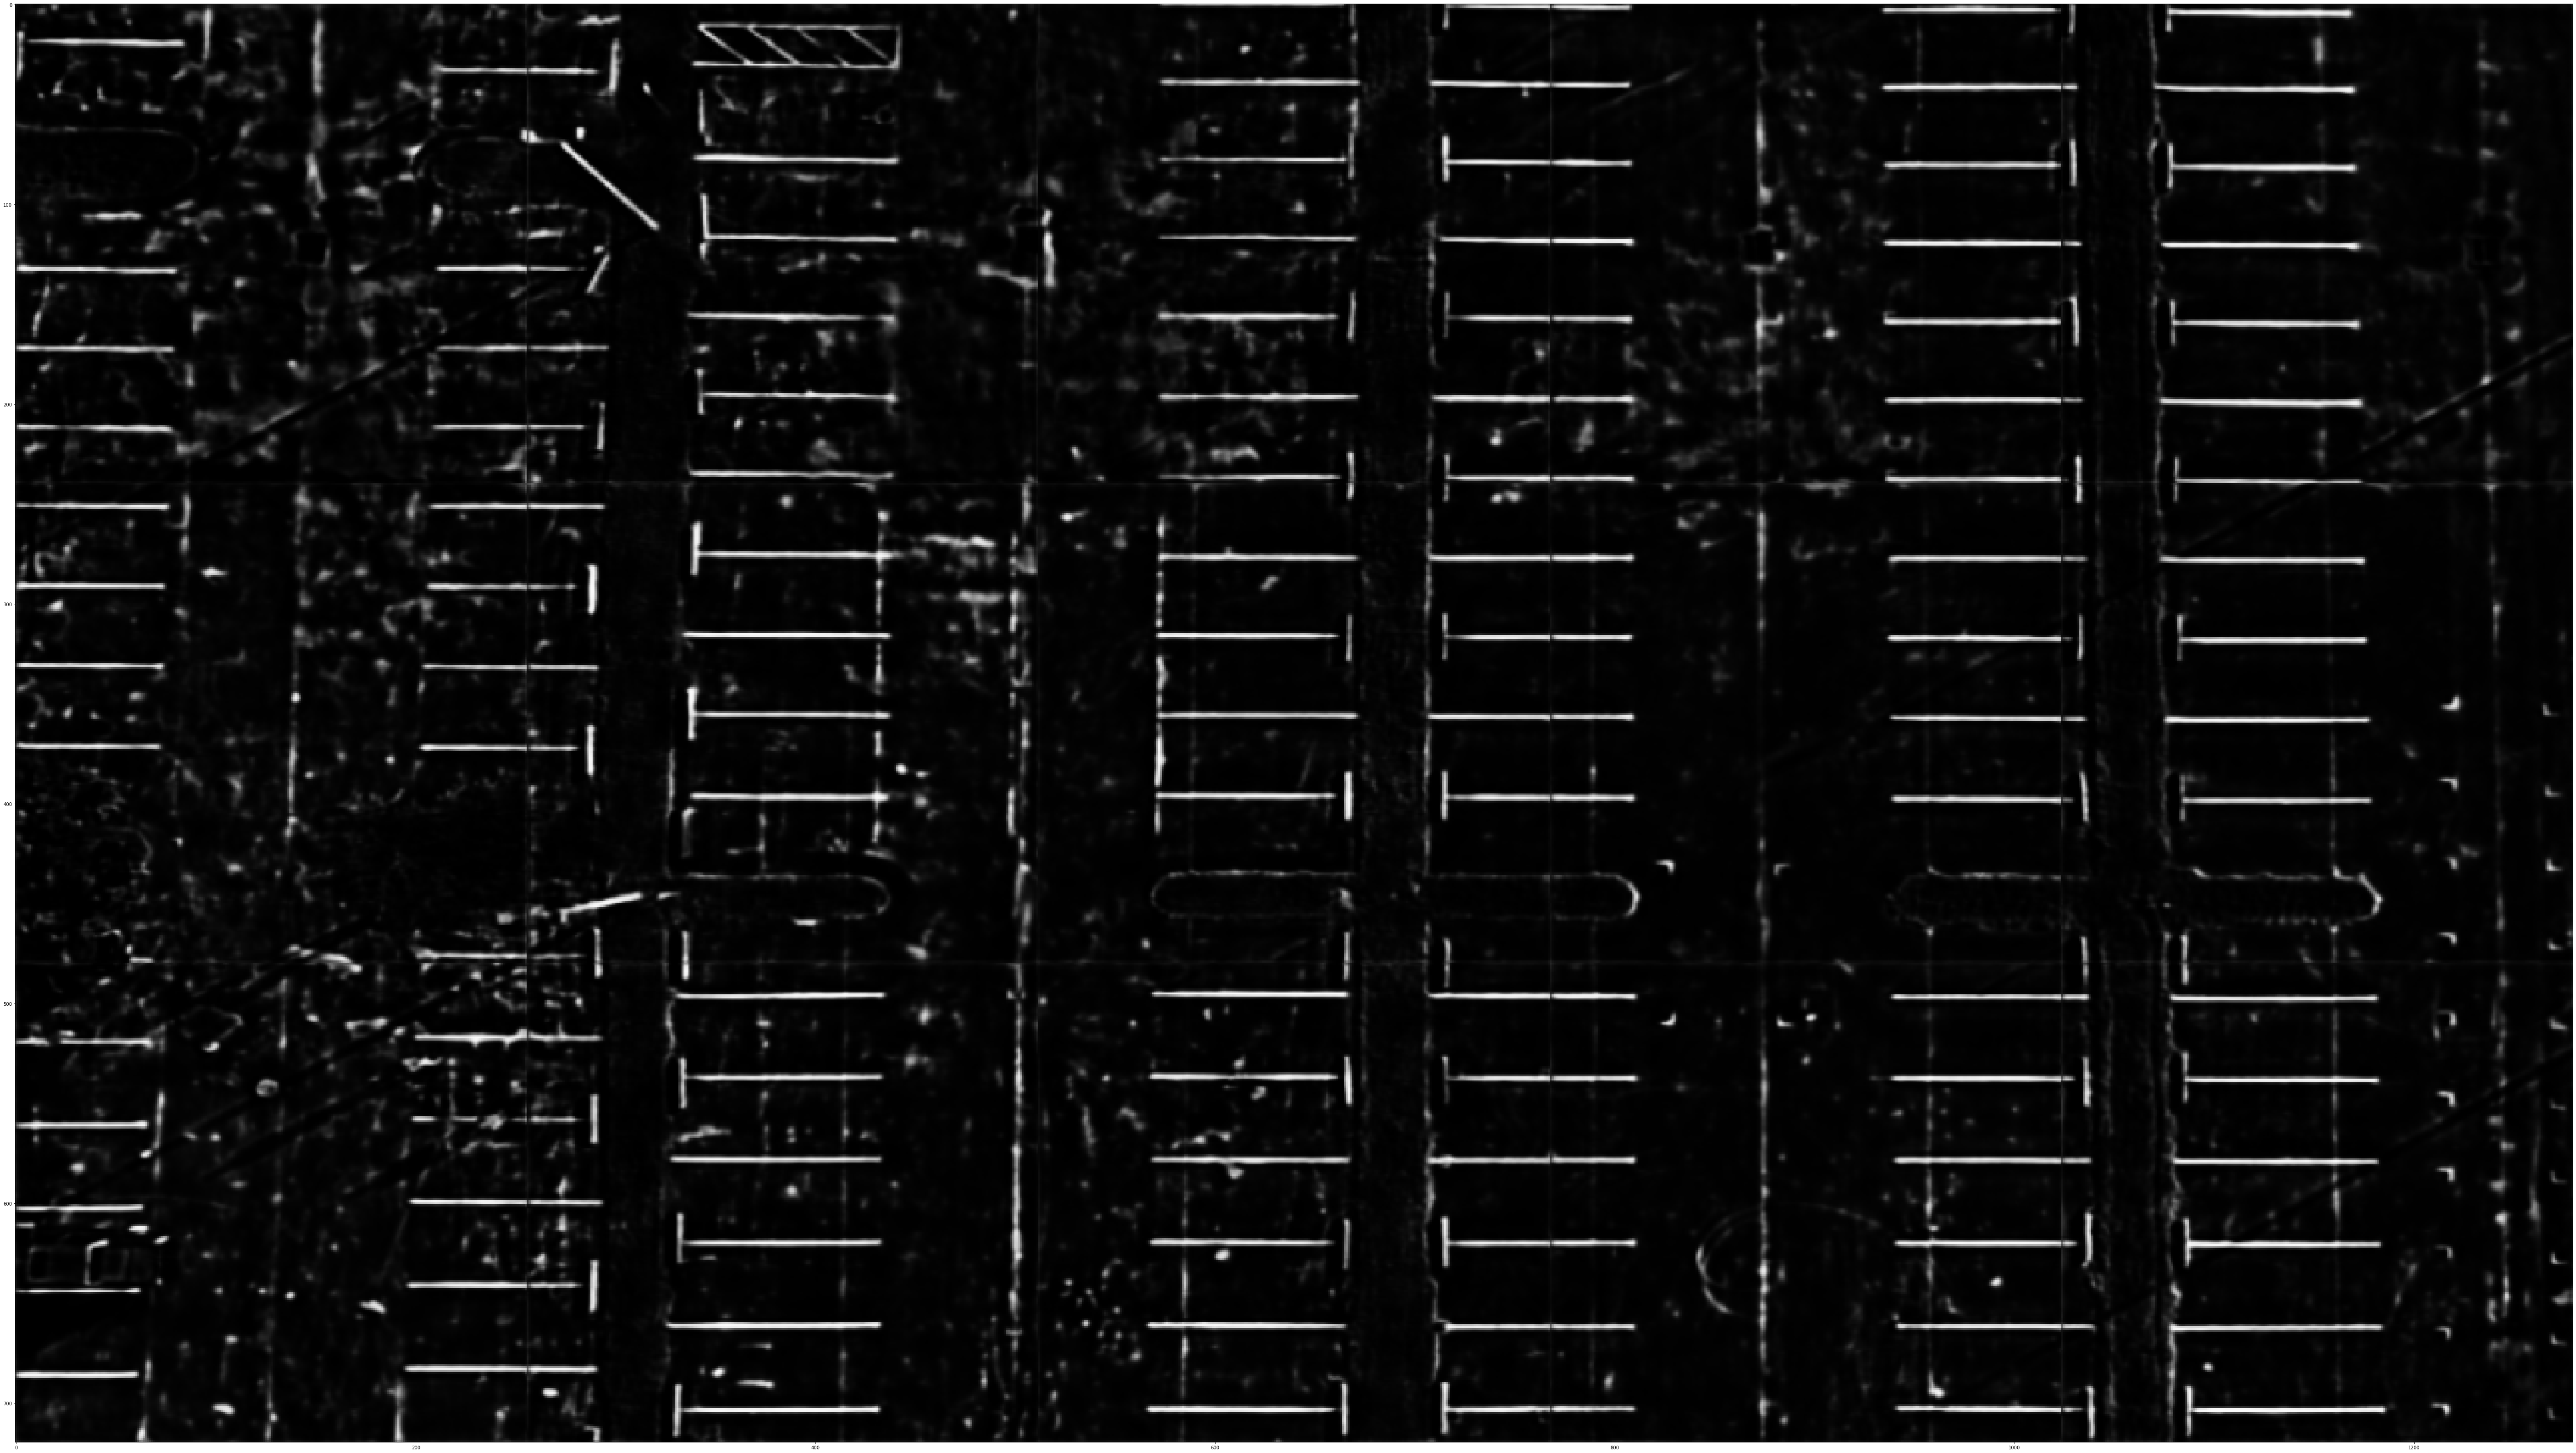

In [67]:
if vis_flag:
    fig, ax = plt.subplots(nrows=1, ncols=1,figsize=(100,100))
    lb_1 = mask[0,:].clone().detach().cpu().numpy()
    lb_1 = np.array([lb_1,lb_1,lb_1]).reshape(3,720,1280)
    lb_1 = np.transpose(lb_1, axes=(1,2,0))
    #lb_1[lb_1>0.3] = 1
    ax.imshow(lb_1,cmap='gray')
    fig.savefig('test/segmented/6.png')
